# The Perceptron algorithm at work

In this notebook, we will look in detail at the Perceptron algorithm for learning a linear classifier in the case of binary labels.

Source: MicroMaster DataScience, UC San Diego, https://www.edx.org/es/micromasters/data-science 

## 1. The algorithm

This first procedure, **evaluate_classifier**, takes as input the parameters of a linear classifier (`w,b`) as well as a data point (`x`) and returns the prediction of that classifier at `x`.

The prediction is:
* `1`  if `w.x+b > 0`
* `0`  if `w.x+b = 0`
* `-1` if `w.x+b < -1`

In [22]:
def evaluate_classifier(w,b,x):
    if (np.dot(w,x) + b) > 0:
        return 1
    if (np.dot(w,x) + b) <= 0:
        return -1
    return 0

Here is the Perceptron training procedure. It is invoked as follows:
* `w,b,converged = train_perceptron(x,y,n_iters)`

where
* `x`: n-by-d numpy array with n data points, each d-dimensional
* `y`: n-dimensional numpy array with the labels (each 1 or -1)
* `n_iters`: the training procedure will run through the data at most this many times (default: 100)
* `w,b`: parameters for the final linear classifier
* `converged`: flag (True/False) indicating whether the algorithm converged within the prescribed number of iterations

If the data is not linearly separable, then the training procedure will not converge.

In [23]:
def train_perceptron(x,y,n_iters):
    n,d = x.shape
    w = np.zeros((d,))
    b = 0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            if (evaluate_classifier(w,b,x[j,:]) != y[j]):
                w = w + y[j] * x[j,:]
                b = b + y[j]
                done = False
        iters = iters + 1
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged

## 2. Experiments with the Perceptron

We start with standard includes.

In [24]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain the two-dimensional data files, `data_1.txt` and `data_2.txt`. These files contain one data point per line, along with a label, like:
* `3 8 1` (meaning that point `x=(3,8)` has label `y=1`)

The next procedure, **run_perceptron**, loads one of these data sets, learns a linear classifier using the Perceptron algorithm, and then displays the data as well as the boundary.

In [55]:
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Run the Perceptron algorithm for at most 100 iterations
    w,b,converged = train_perceptron(x,y,10000)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        print(xx1)
        print(xx2)
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        print(grid)
        Z = np.array([evaluate_classifier(w,b,pt) for pt in grid])
        print(Z)
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()

Let's run this on `data_1.txt`. Try running it a few times; you should get slightly different outcomes, because of the randomization in the learning procedure.

Perceptron algorithm: iterations until convergence:  8
[[ 0.    0.05  0.1  ... 10.85 10.9  10.95]
 [ 0.    0.05  0.1  ... 10.85 10.9  10.95]
 [ 0.    0.05  0.1  ... 10.85 10.9  10.95]
 ...
 [ 0.    0.05  0.1  ... 10.85 10.9  10.95]
 [ 0.    0.05  0.1  ... 10.85 10.9  10.95]
 [ 0.    0.05  0.1  ... 10.85 10.9  10.95]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.05  0.05  0.05 ...  0.05  0.05  0.05]
 [ 0.1   0.1   0.1  ...  0.1   0.1   0.1 ]
 ...
 [10.85 10.85 10.85 ... 10.85 10.85 10.85]
 [10.9  10.9  10.9  ... 10.9  10.9  10.9 ]
 [10.95 10.95 10.95 ... 10.95 10.95 10.95]]
[[ 0.    0.  ]
 [ 0.05  0.  ]
 [ 0.1   0.  ]
 ...
 [10.85 10.95]
 [10.9  10.95]
 [10.95 10.95]]
[ 1  1  1 ... -1 -1 -1]


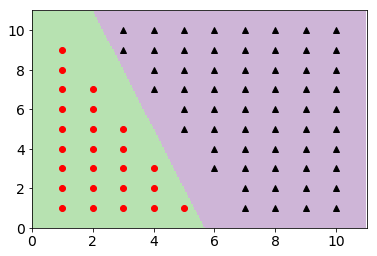

In [56]:
run_perceptron('data_1.txt')

And now, let's try running it on `data_2.txt`. *What's going on here?*

Perceptron algorithm: did not converge within the specified number of iterations


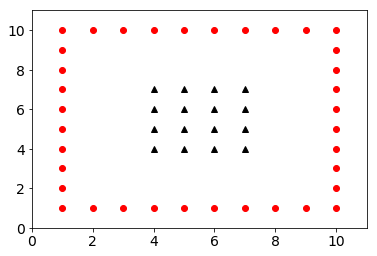

In [57]:
run_perceptron('data_2.txt')

### 3. For you to do

<font color="magenta">Design a data set</font> with the following specifications:
* there are just two data points, with labels -1 and 1
* the two points are distinct, with coordinate values in the range [-1,1]
* the Perceptron algorithm requires more than 1000 iterations to converge

In [65]:
new_data = np.array([[-0.4,-0.5,1.0],[-0.5,-0.4,-1.0]])

In [66]:
def run_perceptron_2(data):
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Run the Perceptron algorithm for at most 100 iterations
    w,b,converged = train_perceptron(x,y,10000)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        print(xx1)
        print(xx2)
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        print(grid)
        Z = np.array([evaluate_classifier(w,b,pt) for pt in grid])
        print(Z)
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()

Perceptron algorithm: iterations until convergence:  3
[[-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]
 [-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]
 [-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]
 ...
 [-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]
 [-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]
 [-1.5  -1.45 -1.4  ...  0.45  0.5   0.55]]
[[-1.5  -1.5  -1.5  ... -1.5  -1.5  -1.5 ]
 [-1.45 -1.45 -1.45 ... -1.45 -1.45 -1.45]
 [-1.4  -1.4  -1.4  ... -1.4  -1.4  -1.4 ]
 ...
 [ 0.45  0.45  0.45 ...  0.45  0.45  0.45]
 [ 0.5   0.5   0.5  ...  0.5   0.5   0.5 ]
 [ 0.55  0.55  0.55 ...  0.55  0.55  0.55]]
[[-1.5  -1.5 ]
 [-1.45 -1.5 ]
 [-1.4  -1.5 ]
 ...
 [ 0.45  0.55]
 [ 0.5   0.55]
 [ 0.55  0.55]]
[-1  1  1 ... -1 -1 -1]


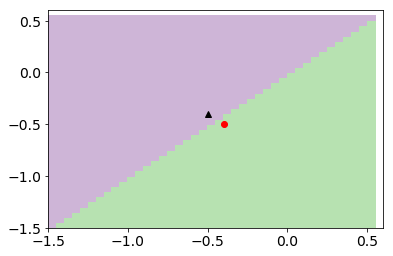

In [67]:
run_perceptron_2(new_data)